In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [118]:
postulantes_edu_df = pd.read_csv('fiuba_1_postulantes_educacion.csv')
postulantes_gye_df = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')
vistas_df = pd.read_csv('fiuba_3_vistas.csv')
postulaciones_df = pd.read_csv('fiuba_4_postulaciones.csv')
avisos_online_df = pd.read_csv('fiuba_5_avisos_online.csv')
avisos_detalle_df = pd.read_csv('fiuba_6_avisos_detalle.csv')

# Analizamos la informacion disponible

In [3]:
postulaciones_df.columns

Index(['idaviso', 'idpostulante', 'fechapostulacion'], dtype='object')

In [4]:
#Verificamos que no haya nulos en las columnas del dataframe
print(postulaciones_df['idaviso'].isnull().any())
print(postulaciones_df['fechapostulacion'].isnull().any())
print(postulaciones_df['idpostulante'].isnull().any())


False
False
False


In [5]:
avisos_detalle_df.columns

Index(['idaviso', 'idpais', 'titulo', 'descripcion', 'nombre_zona', 'ciudad',
       'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area',
       'denominacion_empresa'],
      dtype='object')

In [6]:
print(avisos_detalle_df['idaviso'].isnull().any())
print(avisos_detalle_df['idpais'].isnull().any())
print(avisos_detalle_df['titulo'].isnull().any())
print(avisos_detalle_df['mapacalle'].isnull().any())
print(avisos_detalle_df['tipo_de_trabajo'].isnull().any())
print(avisos_detalle_df['nivel_laboral'].isnull().any())
print(avisos_detalle_df['nombre_area'].isnull().any())
print(avisos_detalle_df['descripcion'].isnull().any())
print(avisos_detalle_df['titulo'].isnull().any())
print(avisos_detalle_df['idaviso'].isnull().any())
print(avisos_detalle_df['ciudad'].isnull().any())
print(avisos_detalle_df['nombre_zona'].isnull().any())

False
False
False
True
False
False
False
False
False
False
True
False


In [7]:
#Observo que solo 47 avisos de 13mil tienen ciudad especificada.
#No es suficiente como para generalizar conclusiones.
#Eliminamos la columna "ciudad"
print(avisos_detalle_df['ciudad'].shape)
print(avisos_detalle_df['ciudad'].count())
avisos_detalle_df = avisos_detalle_df.drop('ciudad', 1)


(13534,)
47


In [83]:
#Observamos que la columna "idpais" siempre tiene el mismo valor.
print(avisos_detalle_df['idpais'].value_counts())


1    13534
Name: idpais, dtype: int64


In [84]:
#Como no brinda informacion relevante, la eliminamos.
avisos_detalle_df = avisos_detalle_df.drop('idpais',1)

In [8]:
avisos_detalle_df['nombre_zona'].value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
Buenos Aires (fuera de GBA)        2
GBA Oeste                          2
Name: nombre_zona, dtype: int64

In [87]:
#Vemos que los datos del archivo de vistas son limitados a unos pocos dias del mes de febrero y solo un dia de marzo.
vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])
print(vistas_df['timestamp'].dt.day.value_counts())
print(vistas_df['timestamp'].dt.month.value_counts())

27    232145
26    227957
28    227160
24     95930
25     90646
23     47236
1      40823
Name: timestamp, dtype: int64
2    921074
3     40823
Name: timestamp, dtype: int64


In [106]:
#Al trabajar con los datos de los postulantes, se ve que hay fechas nulas.
print(postulantes_gye_df.isnull().any())
print()
print(postulantes_gye_df['fechanacimiento'].isnull().value_counts())
print()
print('True indica la cantidad de fechas nulas.')


idpostulante       False
fechanacimiento     True
sexo               False
dtype: bool

False    196138
True       4750
Name: fechanacimiento, dtype: int64

True indica la cantidad de fechas nulas.


In [107]:
postulantes_gye_df['sexo'].value_counts()

FEM           101981
MASC           94339
NO_DECLARA      4568
Name: sexo, dtype: int64

In [108]:
#Se ve que la mayoria de entradas con fecha nula, estan asociadas a sexo no declarado.
postulantes_gye_df = postulantes_gye_df.dropna()
postulantes_gye_df['sexo'].value_counts()

FEM           101677
MASC           94016
NO_DECLARA       445
Name: sexo, dtype: int64

In [109]:
#Como la cantidad de entradas con sexo no declarado bajo considerablemente, no es suficiente como para generalizar.
#Eliminamos esas entradas
postulantes_gye_df = postulantes_gye_df[ (postulantes_gye_df['sexo'] == 'NO_DECLARA') == False]


In [110]:
postulantes_gye_df['sexo'].value_counts()

FEM     101677
MASC     94016
Name: sexo, dtype: int64

In [111]:
#Tambien en este archivo se puede ver que hay fechas anormales, que seran filtradas luego dependiendo de que se busca averiguar.
print('Entradas con fechas incorrectas :')
print(postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')])

Fechas incorrectas :
       idpostulante fechanacimiento  sexo
56206       xkPwXwY      0031-12-11   FEM
71458       LN85Y3b      0029-05-11  MASC
130846      8M2R6pz      0024-02-09   FEM
141832      A36Npjj      0033-09-14   FEM
148638      GNZOvAv      0004-07-19  MASC
149653      1QPQ8QL      0011-03-08  MASC


In [135]:
#Analizando la cantidad de postulaciones por usuario, nos encontramos con tres casos atipicos donde se supera holgadamente el promedio de postulaciones por usuario.
#Sin embargo los datos son irrelevantes a la hora de analizar el archivo en su totalidad.
print(postulaciones_df['idpostulante'].value_counts().head(5))
print()
print('El promedio de postulaciones por usuario es: ', postulaciones_df['idpostulante'].value_counts().mean() )

axmjOE     3166
6rQdqjl    1773
5Mwjak     1485
8MaQjP3    1414
4rNzLje    1213
Name: idpostulante, dtype: int64

El promedio de postulaciones por usuario es:  16.93293277846362


In [9]:
#La cantidad de informacion sobre mapacalle coincide con la cantidad de avisos en capital federal.

print(avisos_detalle_df[avisos_detalle_df['nombre_zona'] == 'Capital Federal'].shape)
print()
print(avisos_detalle_df['mapacalle'].count())

(876, 10)

872


In [10]:
print(avisos_detalle_df['mapacalle'].count())

#Filtro para avisos en capital federal

avisos_caba_df = avisos_detalle_df[avisos_detalle_df['nombre_zona'] == 'Capital Federal']
print(avisos_caba_df.shape)
print(avisos_caba_df['mapacalle'].count())

872
(876, 10)
871


In [12]:
avisos_caba_df.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
24,1110640622,1,Agente Inmobiliario para Oficinas RE/MAX en Zo...,"<p>Si te gusta deleitar a tus clientes, brinda...",Capital Federal,Gobernador Irigoyen 56,Full-time,Senior / Semi-Senior,Comercial,RE/MAX TITANIUM
34,1111035451,1,Checker de procesos (laboratorio),<p>Importante laboratorio farmacéutico naciona...,Capital Federal,Cochabamba 2525,Full-time,Senior / Semi-Senior,Farmacéutica,GI GROUP Argentina
46,1111174081,1,Gestor de Cobranzas - Telecobrador,<p><strong>En MAS ACTIVOS BPO te estamos esper...,Capital Federal,ALEM 116,Part-time,Senior / Semi-Senior,Call Center,MAS ACTIVOS S.A.


¿Que nivel laboral tiene mayor oferta?

In [13]:
merge_detalle_postulaciones_df = postulaciones_df.merge(avisos_detalle_df, on = 'idaviso')

In [14]:
merge_detalle_postulaciones_df.count()

idaviso                 3074206
idpostulante            3074206
fechapostulacion        3074206
idpais                  3074206
titulo                  3074206
descripcion             3074206
nombre_zona             3074206
mapacalle                205497
tipo_de_trabajo         3074206
nivel_laboral           3074206
nombre_area             3074206
denominacion_empresa    3073956
dtype: int64

Se identifican las variables categoricas de la columna "nivel Laboral"

In [15]:
avisos_detalle_df['nivel_laboral'].unique()

array(['Senior / Semi-Senior', 'Junior',
       'Jefe / Supervisor / Responsable', 'Otro',
       'Gerencia / Alta Gerencia / Dirección'], dtype=object)

In [16]:
avisos_detalle_df['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

Text(0,0.5,'Nivel laboral')

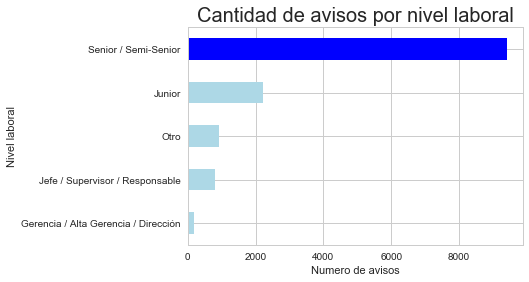

In [17]:
avisos_por_nivel = avisos_detalle_df['nivel_laboral'].value_counts(ascending = True).plot(kind = 'barh', color = ['lightblue','lightblue','lightblue','lightblue','blue'])
avisos_por_nivel.set_title("Cantidad de avisos por nivel laboral", fontsize = 20)
avisos_por_nivel.set_xlabel("Numero de avisos")
avisos_por_nivel.set_ylabel("Nivel laboral")

Text(0.5,1,'Postulaciones por nivel laboral')

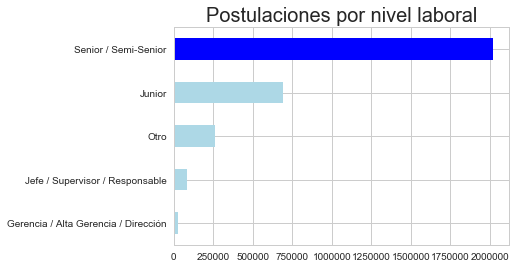

In [18]:
postulaciones_por_nivel = merge_detalle_postulaciones_df['nivel_laboral'].value_counts(ascending=True).plot(kind = 'barh',color = ['lightblue','lightblue','lightblue','lightblue','blue'])
postulaciones_por_nivel.set_title("Postulaciones por nivel laboral", fontsize = 20)

# ¿Algun area laboral tiene mucha oferta en relacion a su demanda? ¿Y algun area tiene demanda de sobra?

Text(0.5,1,'Top 10 areas con mas avisos')

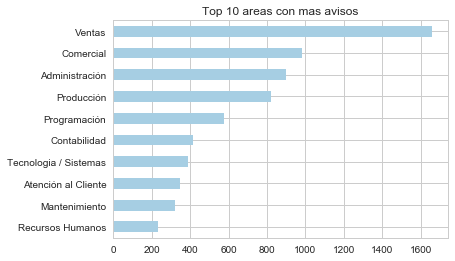

In [19]:
avisos_por_nombre_area = avisos_detalle_df['nombre_area'].value_counts().head(10).sort_values().plot(kind = 'barh',colormap='Paired')
avisos_por_nombre_area.set_title("Top 10 areas con mas avisos")

Text(0.5,1,'Top 10 areas con mas postulaciones')

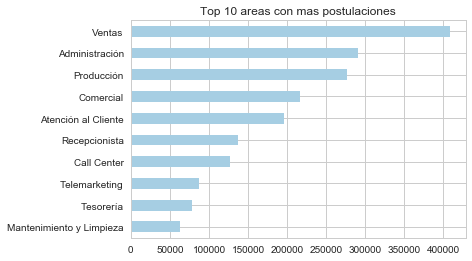

In [20]:
postulaciones_por_nombre_area = merge_detalle_postulaciones_df['nombre_area'].value_counts().head(10).sort_values().plot(kind = 'barh',colormap='Paired')
postulaciones_por_nombre_area.set_title("Top 10 areas con mas postulaciones")

In [21]:
postulaciones_df

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03
5,1112277633,5awk,2018-01-29 13:34:44
6,1112302347,5awk,2018-02-07 20:49:22
7,1112291495,5awk,2018-02-07 20:50:13
8,1112304011,5awk,2018-02-07 20:51:15
9,1112326289,5awk,2018-02-09 20:24:57


In [22]:
#Empiezo a relacionar la cantidad de postulaciones con la cantidad de avisos (por area).
#La condicion esta dada por el 25% del promedio de avisos aproximadamente.
merge = avisos_detalle_df['nombre_area'].value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_avisos']
merge.columns = columnas
merge = merge[(merge['cantidad_avisos']) > 30]
merge.head()

,nombre_area,cantidad_avisos
0,Ventas,1659
1,Comercial,983
2,Administración,901
3,Producción,821
4,Programación,576


In [23]:
df = merge_detalle_postulaciones_df['nombre_area'].value_counts().to_frame().reset_index()
columnas = ['nombre_area','cantidad_postulaciones']
df.columns = columnas

df.head()

,nombre_area,cantidad_postulaciones
0,Ventas,408148
1,Administración,291135
2,Producción,277089
3,Comercial,216677
4,Atención al Cliente,195636


In [24]:
merge = merge.merge(df, on = 'nombre_area')
merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones
0,Ventas,1659,408148
1,Comercial,983,216677
2,Administración,901,291135
3,Producción,821,277089
4,Programación,576,8188


In [25]:
merge['postulaciones/avisos'] = ( merge['cantidad_postulaciones'] ) / (merge['cantidad_avisos'] )

merge.head()

,nombre_area,cantidad_avisos,cantidad_postulaciones,postulaciones/avisos
0,Ventas,1659,408148,246.020494
1,Comercial,983,216677,220.424212
2,Administración,901,291135,323.124306
3,Producción,821,277089,337.501827
4,Programación,576,8188,14.215278


Text(0.5,1,'Areas con mayor postulaciones por aviso')

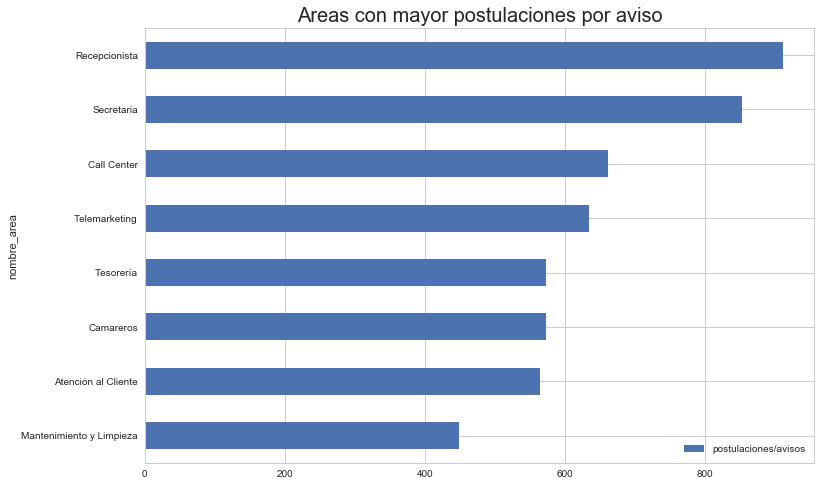

In [26]:
merge.groupby('nombre_area').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos',ascending = False).head(8).sort_values(by='postulaciones/avisos').plot(kind = 'barh',figsize = (12,8)).set_title('Areas con mayor postulaciones por aviso', fontsize=20)
#Grafico de relacion entre cantidad de postulaciones y cantidad de avisos por nombre de area. Ojo con la cantidad de avisos, ecuacion mas peligrosa de la historia.

Text(0.5,1,'Areas con menor postulaciones por aviso')

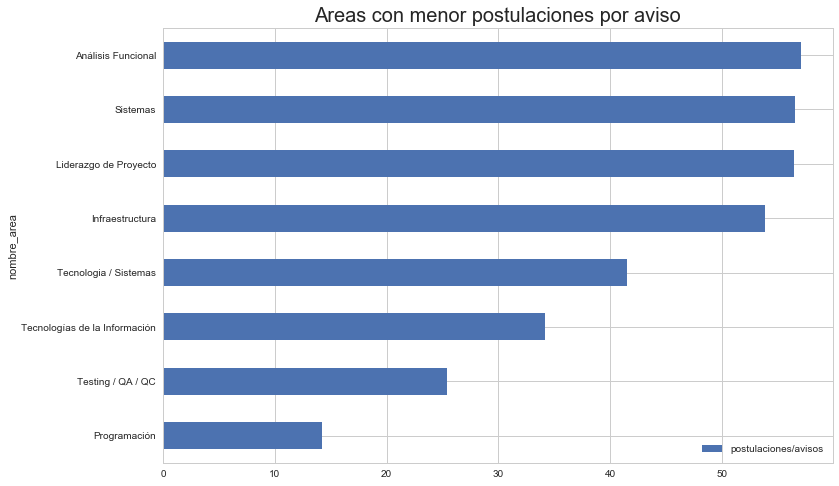

In [27]:
merge.groupby('nombre_area').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos',ascending = False).tail(8).sort_values(by='postulaciones/avisos').plot(kind = 'barh',figsize = (12,8)).set_title('Areas con menor postulaciones por aviso', fontsize=20)


Conclusión: Programacion es el area que menor demanda tiene en relacion a su oferta, siendo que por cada aviso relacionado a programacion en promedio se postulan menos de 20 personas, en contraste con Atencion al cliente, a la cual por cada aviso se postulan en promedio mas de 500 personas.

# ¿Alguna empresa esta acaparando mas postulaciones que las demás en relacion con su cantidad de avisos?

Text(0.5,0,'Cantidad de avisos')

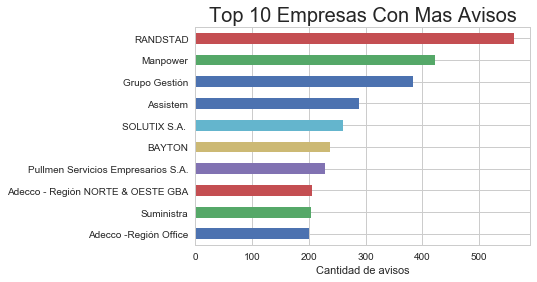

In [28]:
empresas_con_mas_avisos = avisos_detalle_df['denominacion_empresa'].value_counts().head(10).sort_values().plot(kind = 'barh')
empresas_con_mas_avisos.set_title("Top 10 Empresas Con Mas Avisos", fontsize = 20)
empresas_con_mas_avisos.set_xlabel('Cantidad de avisos')

Text(0.5,1,'Top 10 Empresas Con Mas Postulaciones')

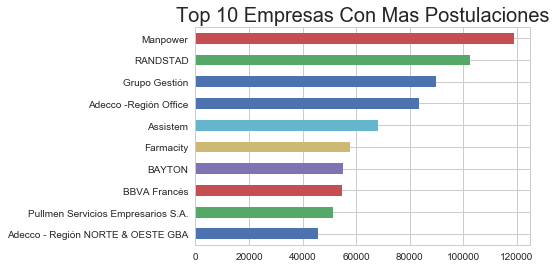

In [29]:
empresas_con_mas_postulaciones = merge_detalle_postulaciones_df['denominacion_empresa'].value_counts().head(10).sort_values().plot(kind = 'barh')
empresas_con_mas_postulaciones.set_title("Top 10 Empresas Con Mas Postulaciones", fontsize = 20)

In [30]:
#Ahora veo la relacion entre postulaciones y avisos pero con las empresas.
merge = avisos_detalle_df['denominacion_empresa'].value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_avisos']
merge.columns = columnas
merge = merge[ (merge['cantidad_avisos'] > 20 ) ]
merge.head()

,denominacion_empresa,cantidad_avisos
0,RANDSTAD,562
1,Manpower,422
2,Grupo Gestión,383
3,Assistem,289
4,SOLUTIX S.A.,260


In [31]:
df = merge_detalle_postulaciones_df['denominacion_empresa'].value_counts().reset_index()
columnas = ['denominacion_empresa','cantidad_postulaciones']
df.columns = columnas
df.head()

,denominacion_empresa,cantidad_postulaciones
0,Manpower,119013
1,RANDSTAD,102640
2,Grupo Gestión,89950
3,Adecco -Región Office,83530
4,Assistem,68125


In [32]:
merge = merge.merge(df, on = 'denominacion_empresa')
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones
0,RANDSTAD,562,102640
1,Manpower,422,119013
2,Grupo Gestión,383,89950
3,Assistem,289,68125
4,SOLUTIX S.A.,260,8206


In [33]:
merge['postulaciones/avisos'] = ( merge['cantidad_postulaciones'] / merge['cantidad_avisos'])
merge.head()

,denominacion_empresa,cantidad_avisos,cantidad_postulaciones,postulaciones/avisos
0,RANDSTAD,562,102640,182.633452
1,Manpower,422,119013,282.021327
2,Grupo Gestión,383,89950,234.856397
3,Assistem,289,68125,235.726644
4,SOLUTIX S.A.,260,8206,31.561538


Text(0.5,1,'Empresas con mayor cantidad de postulantes por aviso')

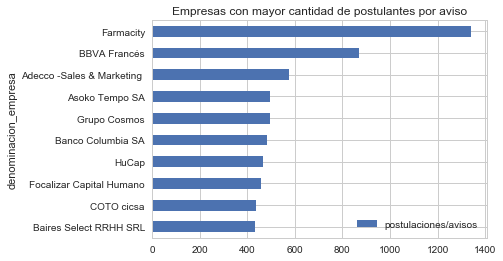

In [34]:
plot = merge.groupby('denominacion_empresa').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos', ascending = False).head(10).sort_values(by = 'postulaciones/avisos').plot(kind = 'barh')
plot.set_title('Empresas con mayor cantidad de postulantes por aviso')
#Grafico de relacion entre postulaciones y avisos (por empresa)

Farmacity sobrepasa por mucho a las demás empresas, seguida de BBVA Francés

Text(0.5,1,'Empresas con menor cantidad de postulantes por aviso')

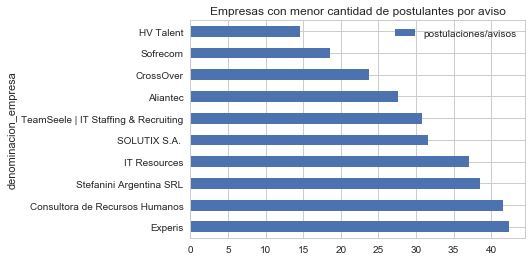

In [35]:
plot = merge.groupby('denominacion_empresa').agg({'postulaciones/avisos' : 'sum'}).sort_values(by = 'postulaciones/avisos', ascending = False).tail(10).plot(kind = 'barh')
plot.set_title('Empresas con menor cantidad de postulantes por aviso')
#Grafico de relacion entre postulaciones y avisos (por empresa)

Nuevamente, las empresas relacionadas a programación son las que menor cantidad de postulantes tienen. Al parecer el renombre y reputación de la empresa tambien influye en la cantidad de postulantes, siendo que las que figuran en la lista de mayor postulaciones por aviso son de nombre conocido.

# (aca empieza otra pregunta)

Para hallar la relacion entre nivel laboral y edad media de los postulantes se descartan los usuarios con fechas nulas o incorrectas.

In [37]:
#Hay fechas que no son correctas, las saco.
print('Cantidad original: 196138')
print('')
print('Fechas incorrectas :')
print(postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')])
print('')
print('Cantidad de fechas incorrectas: ' , postulantes_gye_df[postulantes_gye_df['fechanacimiento'].str.startswith('00')].shape)
postulantes_gye_df = postulantes_gye_df[ (postulantes_gye_df['fechanacimiento'].str.startswith('00')) == False]
print('')
print('Cantidad sin fechas incorrectas : ', postulantes_gye_df.shape)


Cantidad original: 196138

Fechas incorrectas :
       idpostulante fechanacimiento        sexo
56206       xkPwXwY      0031-12-11         FEM
71458       LN85Y3b      0029-05-11        MASC
130846      8M2R6pz      0024-02-09         FEM
141832      A36Npjj      0033-09-14         FEM
145683      dYjV0rb      0012-11-04  NO_DECLARA
148638      GNZOvAv      0004-07-19        MASC
149653      1QPQ8QL      0011-03-08        MASC

Cantidad de fechas incorrectas:  (7, 3)

Cantidad sin fechas incorrectas :  (196131, 3)


In [38]:
#Ahora, sin las fechas incorrectas, puedo calcular la edad promedio.
postulantes_gye_df.fechanacimiento = pd.to_datetime(postulantes_gye_df.fechanacimiento)
postulantes_gye_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196131 entries, 0 to 200886
Data columns (total 3 columns):
idpostulante       196131 non-null object
fechanacimiento    196131 non-null datetime64[ns]
sexo               196131 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 6.0+ MB


In [39]:
postulantes_gye_df['edad'] = (2018 - postulantes_gye_df.fechanacimiento.dt.year)
postulantes_gye_df.head()

,idpostulante,fechanacimiento,sexo,edad
0,NM5M,1970-12-03,FEM,48
1,5awk,1962-12-04,FEM,56
2,ZaO5,1978-08-10,FEM,40
3,NdJl,1969-05-09,MASC,49
4,eo2p,1981-02-16,MASC,37


In [40]:
#Hay postulantes con mas de 100 años, tambien los saco
print('Postualantes con edad incorrecta: ')
print(postulantes_gye_df[ ( postulantes_gye_df['edad'] > 90) | (postulantes_gye_df['edad'] < 18) ])

postulantes_gye_df = postulantes_gye_df[ ( (postulantes_gye_df['edad'] > 90) | (postulantes_gye_df['edad'] < 18) ) == False ]



Postualantes con edad incorrecta: 
       idpostulante fechanacimiento  sexo  edad
6869         a5qWAm      2006-01-01  MASC    12
154559      xkdvwm0      1775-07-09  MASC   243
156483      4rP8l0R      1921-08-18   FEM    97
164618      96X1loa      1917-07-08  MASC   101


Text(0.5,1,'Postulantes por edad')

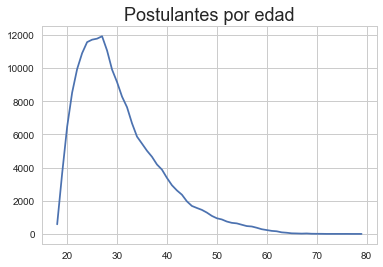

In [41]:
#Visualizacion de las postulaciones segun la edad del postulante.
postulantes_gye_df.edad.value_counts().sort_index().plot().set_title('Postulantes por edad', fontsize=18)

In [42]:
#Ahora junto la informacion de las edades con el data frame de postulaciones-avisos.
merge = merge_detalle_postulaciones_df.merge(postulantes_gye_df, on = 'idpostulante')
merge.head()
print(merge.shape)

(3034428, 15)


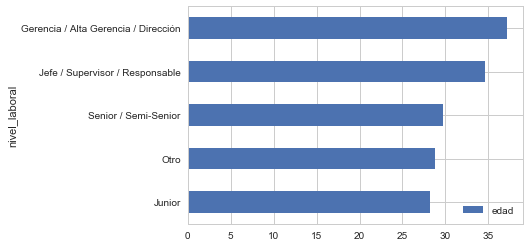

In [43]:
merge.groupby('nivel_laboral').agg({'edad':'mean'}).sort_values(by = 'edad').plot(kind = 'barh')
#Ver si se puede acortar el rango

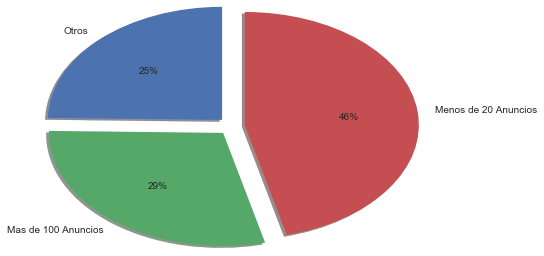

In [44]:
#ANUNCIOS POR EMPRESA
empresas_con_mas_avisos = avisos_detalle_df['denominacion_empresa'].value_counts().to_frame().reset_index()#.head(10).sort_values().plot(kind = 'barh')

menos_de_20 = empresas_con_mas_avisos[empresas_con_mas_avisos['denominacion_empresa']<= 20]
menos_de_20 = menos_de_20['denominacion_empresa'].sum()

mas_de_100 = empresas_con_mas_avisos[empresas_con_mas_avisos['denominacion_empresa'] >= 100]
mas_de_100 = mas_de_100['denominacion_empresa'].sum()

otros = empresas_con_mas_avisos[(empresas_con_mas_avisos['denominacion_empresa'] > 20) &(empresas_con_mas_avisos['denominacion_empresa'] < 100) ]
otros = otros['denominacion_empresa'].sum()

pie_chart = plt.pie([otros,mas_de_100,menos_de_20], labels = ['Otros','Mas de 100 Anuncios','Menos de 20 Anuncios'],shadow=True,startangle=90,radius=1.3,explode=(0.1,0.1,0.1),autopct='%1.0f%%')

In [45]:
#Ahora queremos ver la relaciones entre las vistas y las postulaciones
#vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'] )


In [46]:
postulaciones_df['fechapostulacion'].dt.month.value_counts()


2    2125425
1    1276198
Name: fechapostulacion, dtype: int64

In [47]:
vistas_df['timestamp'].dt.month.value_counts()

2    921074
3     40823
Name: timestamp, dtype: int64

In [48]:
vistas_df['timestamp'].dt.hour.value_counts().sort_index().sort_index()

0     45966
1     44273
2     41101
3     35716
4     22249
5     11966
6      7487
7      4550
8      4445
9      5957
10    18679
11    36364
12    50213
13    60972
14    66168
15    63737
16    56415
17    54704
18    56568
19    59214
20    58042
21    53928
22    51527
23    51656
Name: timestamp, dtype: int64

In [49]:
#Observo que la informacion disponible es de solo la ultima semana de febrero, por lo tanto filtro las postulaciones para esa fecha.
#Filtro los dias que tienen datos incompletos
postulaciones_filtradas = postulaciones_df[(postulaciones_df['fechapostulacion'].dt.month == 2 ) & ((postulaciones_df['fechapostulacion'].dt.day > 23) & ( postulaciones_df['fechapostulacion'].dt.day < 29)) ]
vistas = vistas_df[(vistas_df['timestamp'].dt.month == 2 ) & ((vistas_df['timestamp'].dt.day > 23) & ( vistas_df['timestamp'].dt.day < 29)) ]
postulaciones_filtradas.head()

,idaviso,idpostulante,fechapostulacion
12,1112315188,5awk,2018-02-28 15:54:28
13,1112346738,5awk,2018-02-28 15:54:47
14,1112330625,5awk,2018-02-28 15:56:43
15,1112306543,5awk,2018-02-28 15:57:35
16,1112315170,5awk,2018-02-28 15:59:14


In [50]:
postulaciones_filtradas['fechapostulacion'].dt.hour.value_counts().sort_index()

0      6143
1      3787
2      2230
3      1985
4      2727
5      6822
6     13712
7     22489
8     31688
9     36884
10    34429
11    29992
12    28743
13    27738
14    25205
15    25018
16    23231
17    23190
18    22807
19    21237
20    20063
21    18408
22    15352
23    10591
Name: fechapostulacion, dtype: int64

In [51]:
vistas['timestamp'].dt.hour.value_counts().sort_index()

0     36136
1     34463
2     31818
3     28553
4     17512
5     11966
6      7487
7      4550
8      4445
9      5957
10    18679
11    36364
12    50213
13    60972
14    66168
15    63737
16    56415
17    54704
18    52649
19    48844
20    48398
21    44847
22    44346
23    44615
Name: timestamp, dtype: int64

Text(0,0.5,'Cantidad')

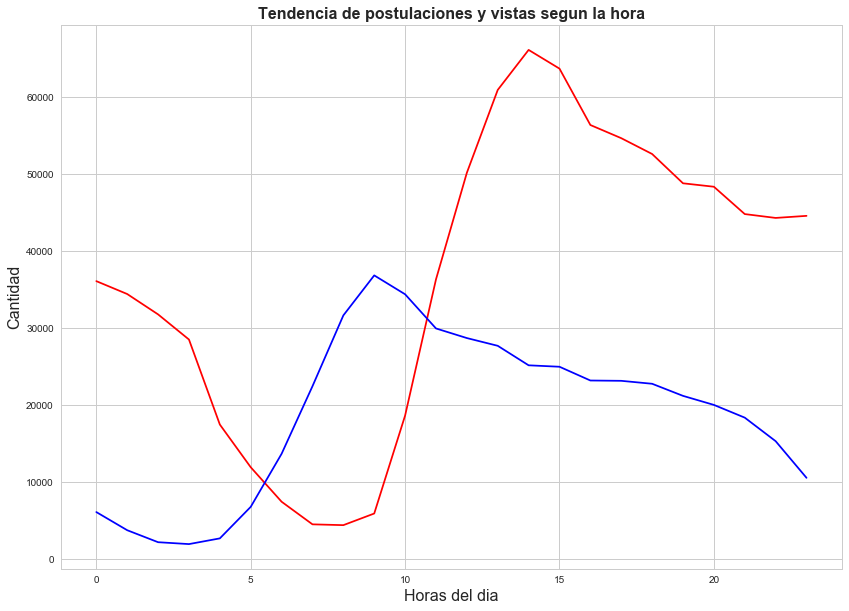

In [52]:
#Falta hacer un label de las lineas

fig = plt.figure() #Creates a figure for the next plot, then disapears

ax = fig.add_subplot(111)#Form and background

plt.title('Tendencia de postulaciones y vistas segun la hora',fontsize=16,fontweight='bold')

ax.set_xlabel('Horas del dia',fontsize=16)


vistas['timestamp'].dt.hour.value_counts().sort_index().plot(color='red')
postulaciones_filtradas['fechapostulacion'].dt.hour.value_counts().sort_index().plot(color='blue',figsize=(14,10))#Density plot
ax.set_ylabel('Cantidad',fontsize=16,)

In [53]:
vistas  = vistas['timestamp'].dt.weekday_name.to_frame()
vistas['timestamp'] = pd.Categorical(vistas['timestamp'], categories=['Monday','Tuesday','Wednesday','Saturday', 'Sunday'], ordered=True)
postulaciones_filtradas = postulaciones_filtradas['fechapostulacion'].dt.weekday_name.to_frame()
postulaciones_filtradas['fechapostulacion'] =pd.Categorical(postulaciones_filtradas['fechapostulacion'], categories=['Monday','Tuesday','Wednesday','Saturday', 'Sunday'], ordered=True)

In [54]:
print(postulaciones_filtradas['fechapostulacion'].value_counts().sort_index())
print()
print(vistas['timestamp'].value_counts().sort_index())

Monday       122688
Tuesday      119845
Wednesday    118296
Saturday      43718
Sunday        49924
Name: fechapostulacion, dtype: int64

Monday       227957
Tuesday      232145
Wednesday    227160
Saturday      95930
Sunday        90646
Name: timestamp, dtype: int64


In [73]:

df = vistas['timestamp'].value_counts().to_frame()
df['postulaciones'] = postulaciones_filtradas['fechapostulacion'].value_counts()
df.columns = ['vistas','postulaciones']

df.sort_index(inplace=True)
df.head()


,vistas,postulaciones
Monday,227957,122688
Tuesday,232145,119845
Wednesday,227160,118296
Saturday,95930,43718
Sunday,90646,49924


Text(22.2,0.5,'Cantidad')

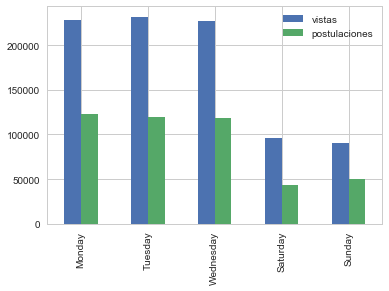

In [74]:
#fig = plt.figure() #Creates a figure for the next plot, then disapears


#ax = fig.add_subplot(111)#Form and background

#plt.title('Postulaciones y Vistas segun los dias de la semana',fontsize=16,fontweight='bold')


#ax.set_xlabel('Dias de la semana',fontsize=16)

df.plot(kind='bar')

#df['postulaciones'] = postulaciones_filtradas['fechapostulacion']

#vistas['timestamp'].value_counts().sort_index().plot(kind='bar',color='red')

#postulaciones_filtradas['fechapostulacion'].value_counts().sort_index().plot(kind='bar',color='blue')#,figsize=(14,10))
ax.set_ylabel('Cantidad',fontsize=16,)

In [76]:
df = postulantes_edu_df.merge(postulaciones_df, on='idpostulante')
df['cantidad'] = 1

Text(0,0.5,'Nivel academico')

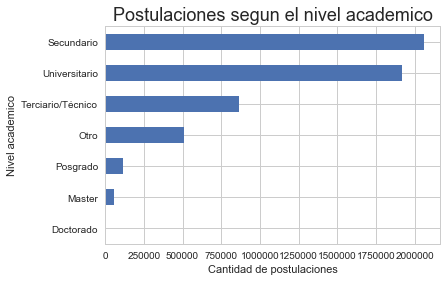

In [82]:
plot = df.groupby('nombre').agg({'cantidad':'count'}).sort_values(by = 'cantidad').plot(kind = 'barh', legend = False)
plot.set_title('Postulaciones segun el nivel academico', fontsize = 18)
plot.set_xlabel('Cantidad de postulaciones')
plot.set_ylabel('Nivel academico')

Text(0.5,1,'Postulaciones segun estado academico actual')

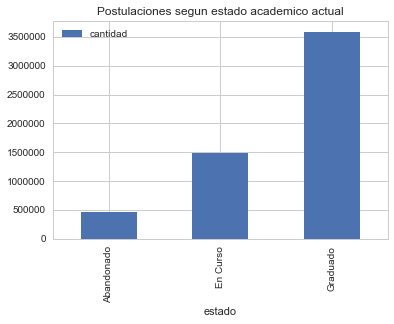

In [59]:
plot = df.groupby('estado').agg({'cantidad':'count'}).plot(kind = 'bar')
plot.set_title('Postulaciones segun estado academico actual')

Text(0.5,1,'Postulaciones segun el genero')

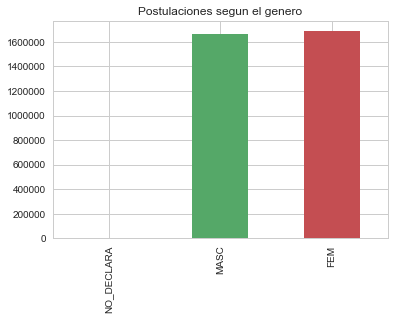

In [60]:
df = postulantes_gye_df.merge(postulaciones_df, on='idpostulante')
plot = df['sexo'].value_counts().sort_values().plot('bar')
plot.set_title('Postulaciones segun el genero')

Text(0.5,1,' Postulaciones segun el horario')

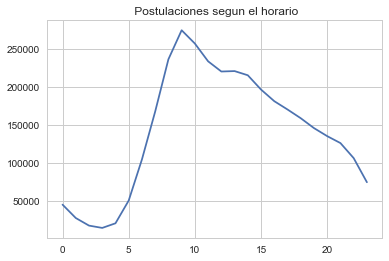

In [61]:
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'])
plot = postulaciones_df['fechapostulacion'].dt.hour.value_counts().sort_index().plot()
plot.set_title(' Postulaciones segun el horario')

Text(0.5,1,'Vistas segun el Horario')

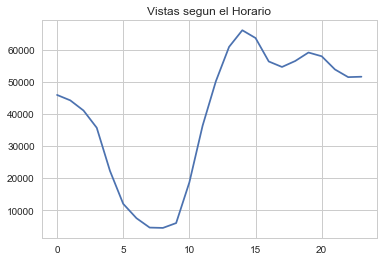

In [62]:
plot = vistas_df['timestamp'].dt.hour.value_counts().sort_index().plot()
plot.set_title('Vistas segun el Horario')

In [63]:
merge = postulaciones_df.merge(avisos_detalle_df, on='idaviso')

Text(0.5,1,'Postulaciones por nivel laboral')

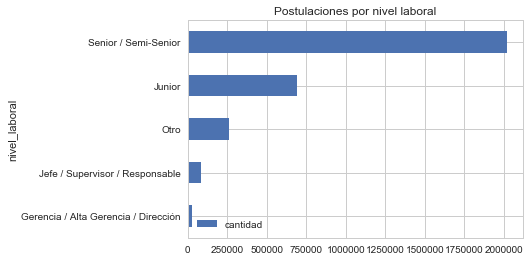

In [64]:
plot = merge.groupby('nivel_laboral').agg({'idpostulante':'count'}).sort_values(by='idpostulante').rename(columns={'idpostulante':'cantidad'}).plot(kind='barh')
plot.set_title('Postulaciones por nivel laboral')

In [65]:
#vistas promedio por persona en el rango dado

vistas_df['cantidad'] = 1
vistas_per_capita = vistas_df.groupby('idpostulante').agg({'cantidad':'count'})
vistas_per_capita['cantidad'].mean()

11.000274464508308

# ¿Las palabras en los títulos de los anuncios pueden predecir o atraer postulaciones?

In [66]:
from collections import Counter
#Hago una lista con todas las palabras que aparecen en los titulos y sus apariciones, sacando los chars "( ) ,"
contador_palabras_avisos = Counter(" ".join(avisos_detalle_df['titulo'].values.tolist()).lower().replace("(",'').replace(")",'').replace(",",' ').split(" ")).items()

#Formo un DF con esa lista

contador_palabras_avisos = list(contador_palabras_avisos)


contador_palabras_avisos_df = pd.DataFrame(contador_palabras_avisos)
contador_palabras_avisos_df.head()

contador_palabras_avisos_df.columns=['palabra','apariciones']
contador_palabras_avisos_df=contador_palabras_avisos_df.set_index('palabra')

#Saco los adverbios del df
adverbios=['','-','de','con','en','y','a','para','la','al','los','/']
contador_palabras_avisos_df=contador_palabras_avisos_df.drop(adverbios)
contador_palabras_avisos_df.head()

,apariciones
palabra,
vendedor/a,75
provincia,24
santa,83
fe,64
enfermeras,4


Text(0.5,1,'Palabras mas frecuentes en titulos de anuncios')

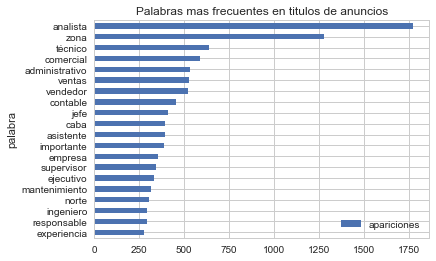

In [67]:
plot = contador_palabras_avisos_df.sort_values(by='apariciones',ascending=False).head(20).sort_values(by='apariciones').plot(kind='barh')
plot.set_title('Palabras mas frecuentes en titulos de anuncios')

In [68]:
#Por cada postulacion cuento las palabras que aparecen en el titulo del aviso al que se postularon
contador_palabras_postulaciones = Counter(" ".join(merge_detalle_postulaciones_df['titulo'].values.tolist()).lower().replace("(",'').replace(")",'').strip(")").replace(")",'').replace(",",' ').split(" ")).items()

contador_palabras_postulaciones = list(contador_palabras_postulaciones)


contador_palabras_postulaciones_df=pd.DataFrame(contador_palabras_postulaciones)

contador_palabras_postulaciones_df.columns=['palabra','apariciones']
contador_palabras_postulaciones_df=contador_palabras_postulaciones_df.set_index('palabra')

contador_palabras_postulaciones_df=contador_palabras_postulaciones_df.drop(adverbios)


Text(0.5,1,'Palabras mas frecuentes en titulos de anuncios a los que se postularon')

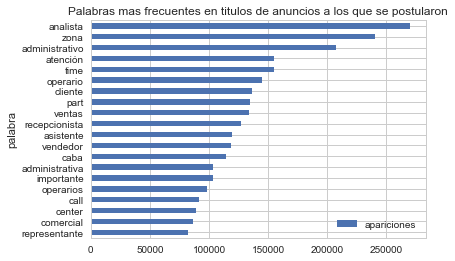

In [69]:
plot = contador_palabras_postulaciones_df.sort_values(by='apariciones',ascending=False).head(20).sort_values(by='apariciones').plot(kind='barh')
plot.set_title('Palabras mas frecuentes en titulos de anuncios a los que se postularon')

In [70]:
# me quedo con las palabras que figuran en al menos 20 avisos
contador_palabras_avisos_df_filtrado=contador_palabras_avisos_df.loc[contador_palabras_avisos_df['apariciones']>=20]

efectividad_palabras_df = contador_palabras_postulaciones_df.sort_values(by='apariciones',ascending=False) / contador_palabras_avisos_df_filtrado.sort_values(by='apariciones',ascending=False)
efectividad_palabras_df = efectividad_palabras_df.dropna()
efectividad_palabras_df.columns=['postulaciones/avisos']

Text(0.5,1,'Palabras que menos postulaciones atraen')

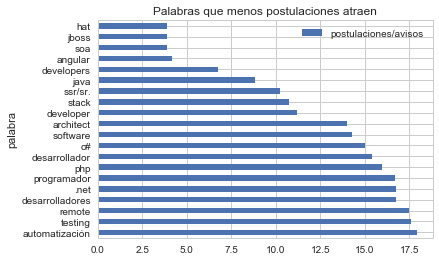

In [71]:
plot = efectividad_palabras_df.sort_values(by='postulaciones/avisos',ascending= False).tail(20).plot(kind='barh')
plot.set_title('Palabras que menos postulaciones atraen') 

Text(0.5,1,'Palabras que mas postulaciones atraen')

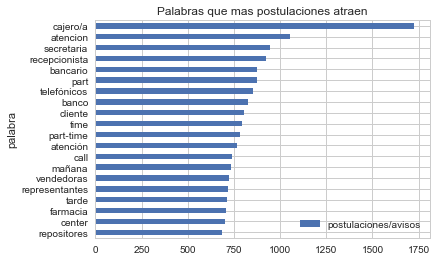

In [72]:
plot = efectividad_palabras_df.sort_values(by='postulaciones/avisos',ascending= False).head(20).sort_values(by='postulaciones/avisos').plot(kind='barh',title='Palabras que mas postulaciones atraen')
plot.set_title('Palabras que mas postulaciones atraen')

Algunas conclusiones: Puede verse que el empleo de cajero tiene significativamente más postulaciones por aviso que los demás, lo que explica el por qué el area de ventas figura en la primer posicion del top de areas con mas postulaciones. Tambien puede verse que los anuncios con palabras relacionadas a programación tienen relativamente muy pocas postulaciones (¿Algo bueno para nosotros?). Ademas, si bien analista es la palabra que mas aparece en los titulos de las postulaciones, esto seguramente se deba a que es la que mas figura en todos los avisos en general.